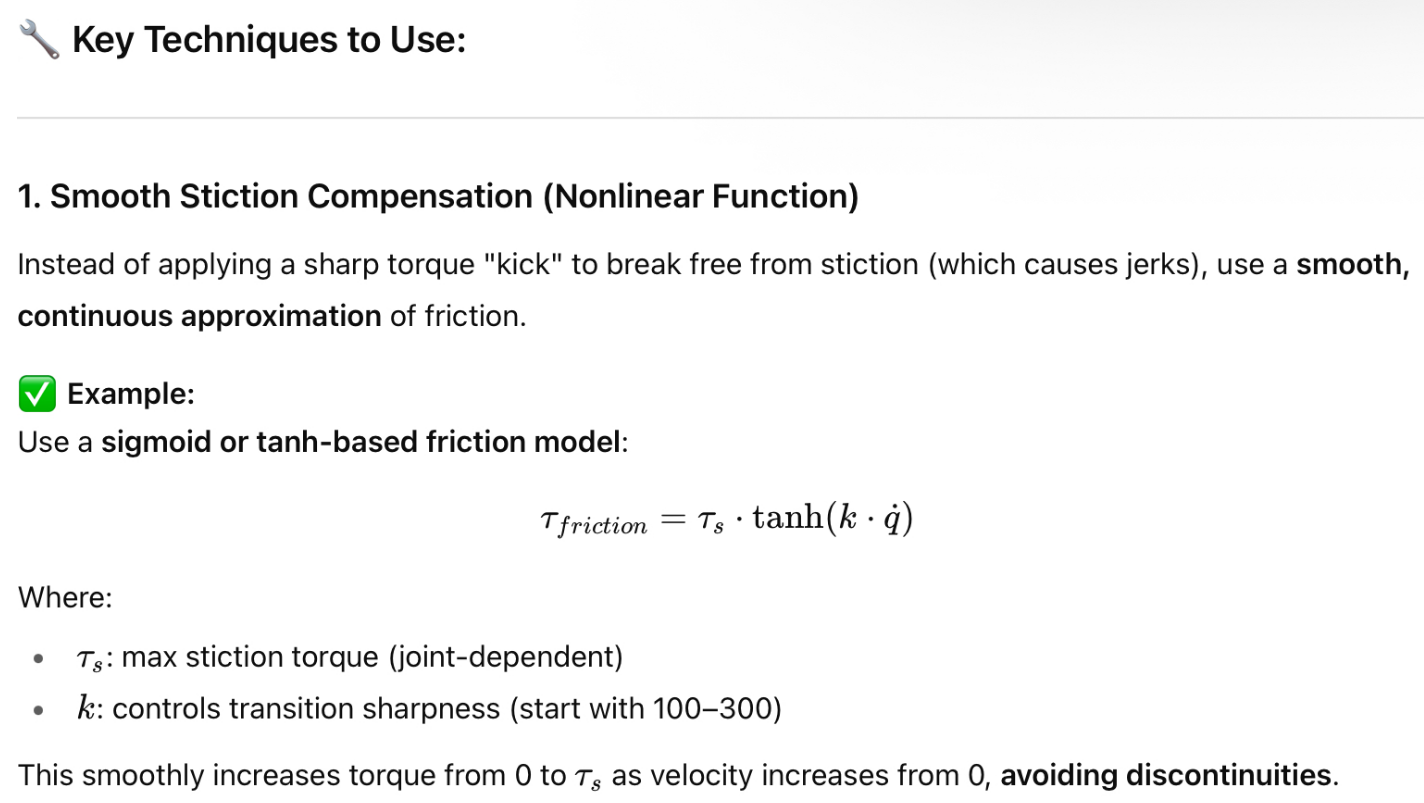

In [5]:
import matplotlib.pyplot as plt
import math
import numpy as np

In [6]:
q = np.linspace(-0.1, 0.1, 50)
K = 100

In [7]:
y = np.tanh(K*q)
y2 = np.tanh(50*q)

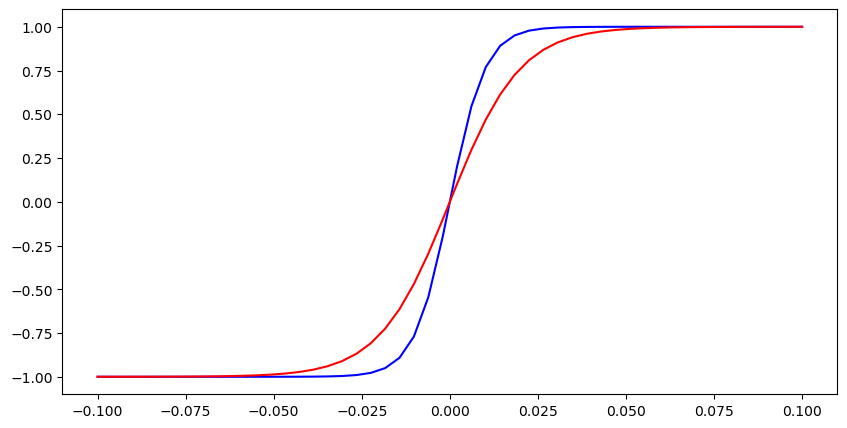

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(q, y, label='tanh(K*q)', color='blue')
plt.plot(q, y2, label='tanh(K*q)', color='red')
plt.show()

## Stribeck Function  (Nonlinear Friction Model)

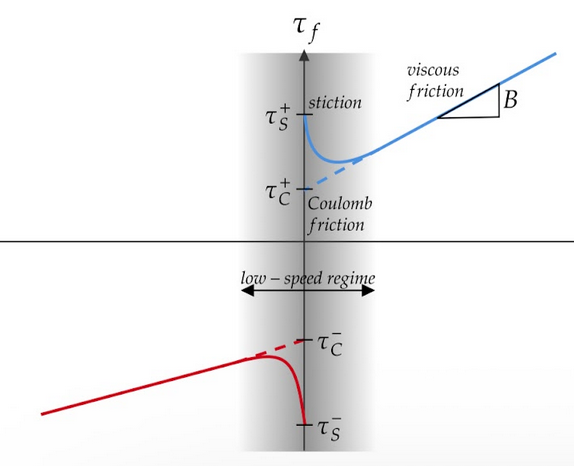

It combines several effects:

1.  Stiction (static friction) : Large torque needed to overcome sticking at zero velocity. Different for positive and negative motion.

2. Coulomb friction: Constant torque opposing motion once the joint is moving (independent of speed).

3. Viscous friction : Torque proportional to velocity.

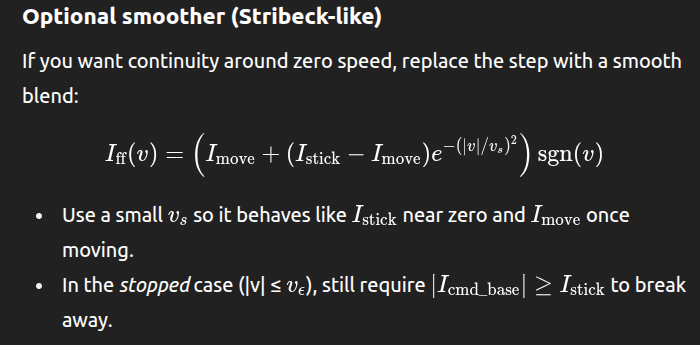

In [9]:
q2 = np.linspace(-0.1, 0.1, 50)
K = 100

In [10]:
I_coulomb = 14
I_stiction = 22
v_stiction = 0.01
I_coulomb2 = 14
I_stiction2 = 22
v_stiction2 = 0.02

In [11]:
sgn = np.sign(q2)
I_ff = (I_coulomb +   (I_stiction - I_coulomb) * np.exp(-(np.abs(q2) / v_stiction)**2)) * sgn

In [12]:
sgn = np.sign(q2)
I_ff2 = (I_coulomb2 +   (I_stiction2 - I_coulomb2) * np.exp(-(np.abs(q2) / v_stiction2)**2)) * sgn

In [13]:
y_tanh = 14*np.tanh(50*q2)

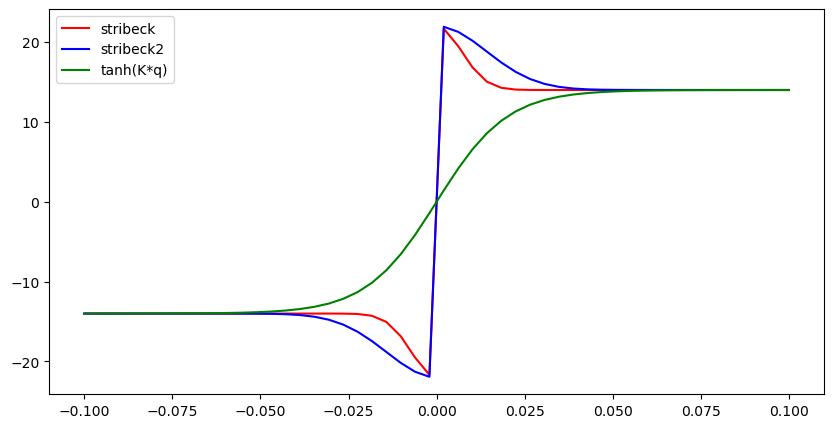

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(q2, I_ff, label='stribeck', color='red')
plt.plot(q2, I_ff2, label='stribeck2', color='blue')
plt.plot(q2, y_tanh, label='tanh(K*q)', color='green')
plt.legend(loc='upper left')
plt.show()

In [15]:
# v is joint velocity (use qd2, not q2 position)
v = q2

p = 2.0          # shape (p=2 is your original). Try 1.0..6.0
blend = np.exp(- (np.abs(v) / v_stiction2)**p)   # 1 at v=0 → 0 as |v|↑

# Optional: smooth sign to avoid a discontinuity at v=0
vel_eps = 1e-3
sgn_smooth = np.tanh(v / vel_eps)

I_ff3 = (I_coulomb2 + (I_stiction2 - I_coulomb2) * blend) * sgn_smooth

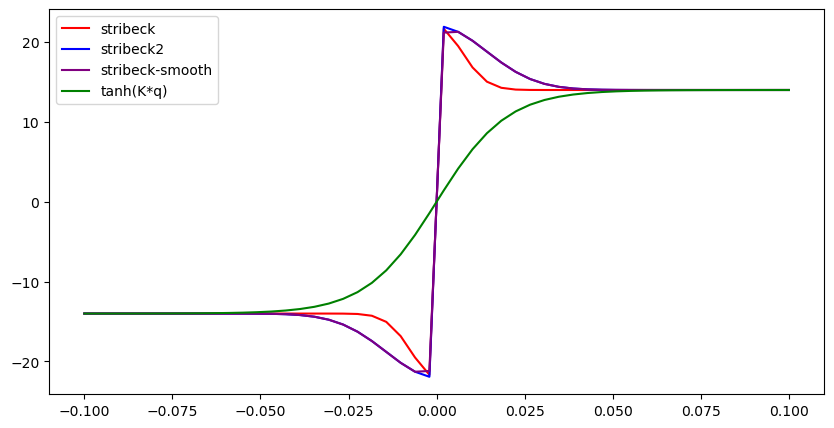

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(q2, I_ff, label='stribeck', color='red')
plt.plot(q2, I_ff2, label='stribeck2', color='blue')
plt.plot(q2, I_ff3, label='stribeck-smooth', color='purple')
plt.plot(q2, y_tanh, label='tanh(K*q)', color='green')
plt.legend(loc='upper left')
plt.show()

In [17]:
v = q2
I_coulomb3 = 10
I_stiction3 = 22 
v_stiction2 = 0.04

k = 40.0          # steepness; larger k = sharper drop
blend = 1.0 / (1.0 + (np.abs(v) / v_stiction2)**k)

vel_eps = 0.02
sgn_smooth = np.tanh(v / vel_eps)

I_ff4 = (I_coulomb3 + (I_stiction3 - I_coulomb3) * blend) * sgn_smooth

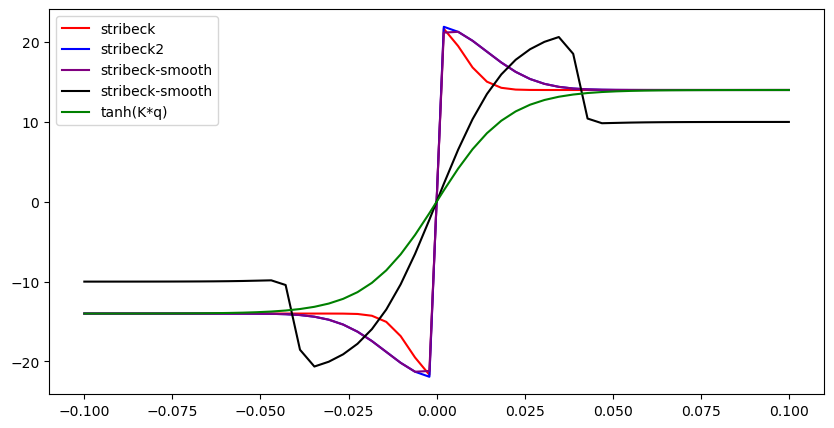

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(q2, I_ff, label='stribeck', color='red')
plt.plot(q2, I_ff2, label='stribeck2', color='blue')
plt.plot(q2, I_ff3, label='stribeck-smooth', color='purple')
plt.plot(q2, I_ff4, label='stribeck-smooth', color='black')
plt.plot(q2, y_tanh, label='tanh(K*q)', color='green')
plt.legend(loc='upper left')
plt.show()

In [19]:
v = q2
I_coulomb3 = 200
I_stiction3 = 400 
v_stiction3 = 0.04


k = 30.0          # steepness; larger k = sharper drop
blend = 1.0 / (1.0 + (np.abs(v) / v_stiction3)**k)

vel_eps = 0.02
sgn_smooth = np.tanh(v / vel_eps)

I_ff5 = (I_coulomb3 + (I_stiction3 - I_coulomb3) * blend) * sgn_smooth

In [20]:

sgn = np.sign(q2)
I_ff6 = (I_coulomb3 +   (I_stiction3 - I_coulomb3) * np.exp(-(np.abs(q2) / v_stiction3)**2)) * sgn

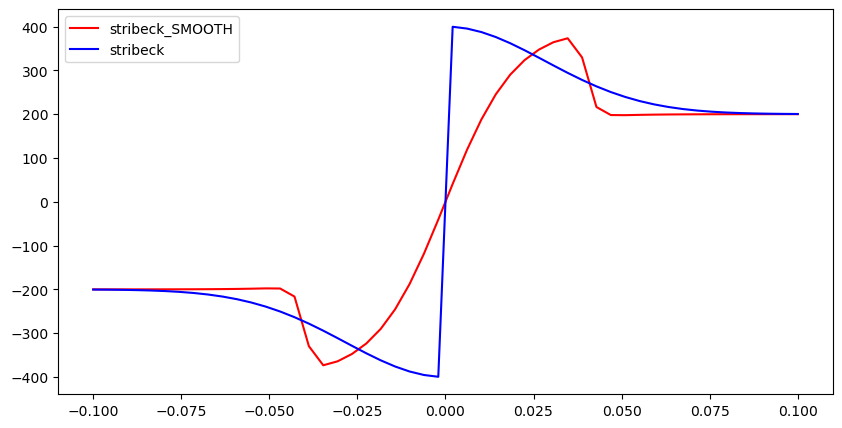

In [21]:
plt.figure(figsize=(10, 5))
plt.plot(q2, I_ff5, label='stribeck_SMOOTH', color='red')
plt.plot(q2, I_ff6, label='stribeck', color='BLUE')
plt.legend(loc='upper left')
plt.show()

In [22]:
v_stiction3 = 0.03

sgn = np.sign(q2)
I_ff6 = (I_coulomb3 +   (I_stiction3 - I_coulomb3) * np.exp(-(np.abs(q2) / v_stiction3)**2)) * sgn

k = 100.0  # Tune this value based on your system
sgn = np.tanh(k * q2)
exp_term = np.exp(-(np.abs(q2) / v_stiction3)**2)
I_ff7 = I_coulomb3 + (I_stiction3 - I_coulomb3) * exp_term
I_ff7 *= sgn

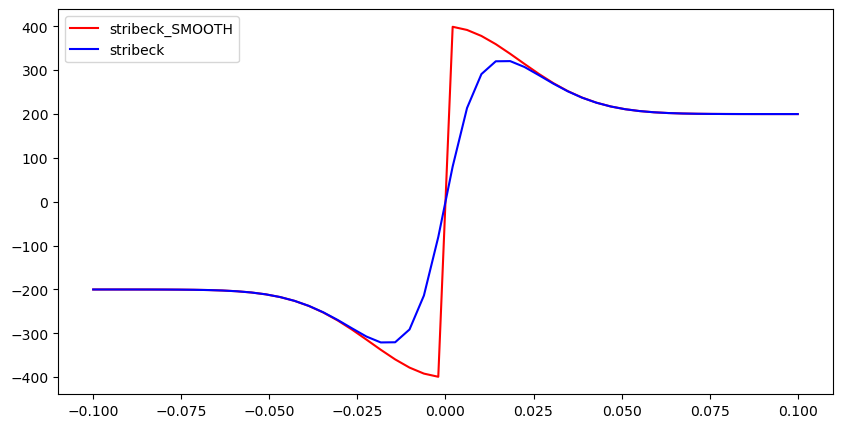

In [23]:
plt.figure(figsize=(10, 5))
plt.plot(q2, I_ff6, label='stribeck_SMOOTH', color='red')
plt.plot(q2, I_ff7, label='stribeck', color='BLUE')
plt.legend(loc='upper left')
plt.show()

## REFERENCE BEST PERFORMANCE

In [83]:
v = q2
I_coulomb3 = 250
I_stiction3 = 400 
v_stiction3 = 0.02
k = 100.0          # steepness; larger k = sharper drop
blend = 1.0 / (1.0 + (np.abs(v) / v_stiction3)**k)
vel_eps = 0.007
sgn_smooth = np.tanh(v / vel_eps)
I_ff_ref = (I_coulomb3 + (I_stiction3 - I_coulomb3) * blend) * sgn_smooth

In [84]:
## IMPROVEMENT 
v = q2
I_coulomb3 = 250
I_stiction3 = 400 
v_stiction3 = 0.06
k = 700.0          # steepness; larger k = sharper drop
blend = 1.0 / (1.0 + (np.abs(v) / v_stiction3)**k)
vel_eps = 0.04
sgn_smooth = np.tanh(v / vel_eps)
I_ff_impr = (I_coulomb3 + (I_stiction3 - I_coulomb3) * blend) * sgn_smooth

In [85]:
## IMPROVEMENT 2
v = q2
I_coulomb3 = 200
I_stiction3 = 350 
v_stiction3 = 0.06
k = 700.0          # steepness; larger k = sharper drop
blend = 1.0 / (1.0 + (np.abs(v) / v_stiction3)**k)
vel_eps = 0.04
sgn_smooth = np.tanh(v / vel_eps)
I_ff_impr2 = (I_coulomb3 + (I_stiction3 - I_coulomb3) * blend) * sgn_smooth

In [86]:
v_stiction3 = 0.01
sgn = np.sign(q2)
I_ff_basic = (I_coulomb3 +   (I_stiction3 - I_coulomb3) * np.exp(-(np.abs(q2) / v_stiction3)**2)) * sgn

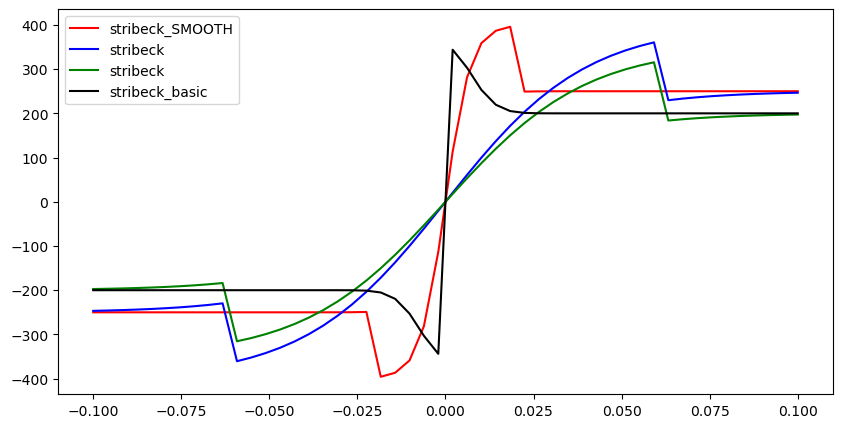

In [87]:
plt.figure(figsize=(10, 5))
plt.plot(q2, I_ff_ref, label='stribeck_SMOOTH', color='red')
plt.plot(q2, I_ff_impr, label='stribeck', color='BLUE')
plt.plot(q2, I_ff_impr2, label='stribeck', color='green')
plt.plot(q2, I_ff_basic, label='stribeck_basic', color='black')
plt.legend(loc='upper left')
plt.show()

In [ ]:
v = q2
I_coulomb3 = 250
I_stiction3 = 400 
v_stiction3 = 0.02
k = 100.0          # steepness; larger k = sharper drop
blend = 1.0 / (1.0 + (np.abs(v) / v_stiction3)**k)
vel_eps = 0.007
sgn_smooth = np.tanh(v / vel_eps)
I_ff_ref = (I_coulomb3 + (I_stiction3 - I_coulomb3) * blend) * sgn_smooth

In [109]:
v = q2
I_coulomb3 = 200
I_stiction3 = 350
v_stiction3 = 0.045
k = 100.0          # steepness; larger k = sharper drop
blend = 1.0 / (1.0 + (np.abs(v) / v_stiction3)**k)
vel_eps = 0.03
sgn_smooth = np.tanh(v / vel_eps)
I_ff_ref2 = (I_coulomb3 + (I_stiction3 - I_coulomb3) * blend) * sgn_smooth

In [110]:
v = q2
I_coulomb3 = 200
I_stiction3 = 350
v_stiction3 = 0.005
sgn = np.sign(q2)
I_basic = (I_coulomb3 +   (I_stiction3 - I_coulomb3) * np.exp(-(np.abs(q2) / v_stiction3)**2)) * sgn


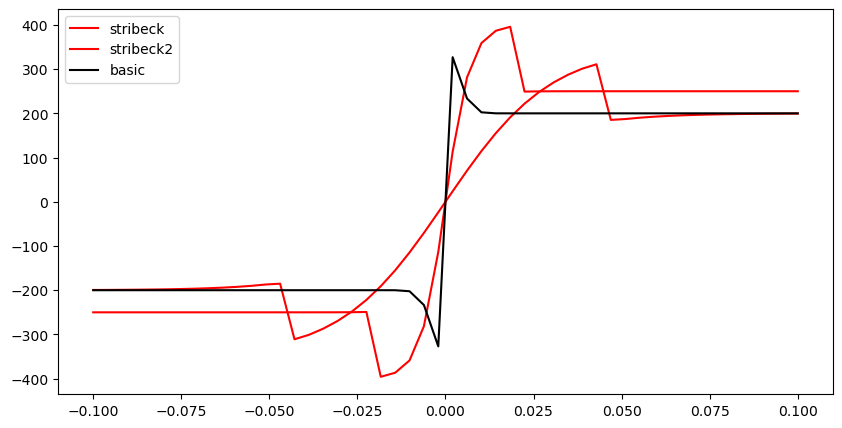

In [111]:
plt.figure(figsize=(10, 5))
plt.plot(q2, I_ff_ref, label='stribeck', color='red')
plt.plot(q2, I_ff_ref2, label='stribeck2', color='red')
plt.plot(q2, I_basic, label='basic', color='black')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# Example: Task Space Stiff Control (1D for illustration)
import numpy as np
Kx = 100.0   # Stiffness [N/m]
Dx = 10.0    # Damping [N/(m/s)]
x_ref = 0.05 # Reference position [m]
x = 0.02     # Current position [m]
xdot_ref = 0.0
xdot = 0.01  # Current velocity [m/s]

F_task = Kx * (x_ref - x) + Dx * (xdot_ref - xdot)
print(f"Task space force: {F_task:.2f} N")

# If you have a Jacobian J, map to joint torque:
# tau = J.T @ F_task

## Task Space Stiff Control

Task space stiff control regulates the robot's end-effector position by applying a virtual spring force in Cartesian space. The control law is:

$$
\mathbf{F}_{task} = \mathbf{K}_x (\mathbf{x}_{ref} - \mathbf{x}) + \mathbf{D}_x (\dot{\mathbf{x}}_{ref} - \dot{\mathbf{x}})
$$

where:
- $\mathbf{F}_{task}$: desired force in task space
- $\mathbf{K}_x$: stiffness matrix
- $\mathbf{D}_x$: damping matrix
- $\mathbf{x}_{ref}$: reference position
- $\mathbf{x}$: current position
- $\dot{\mathbf{x}}_{ref}$: reference velocity
- $\dot{\mathbf{x}}$: current velocity

This force is mapped to joint torques using the Jacobian transpose:

$$
\boldsymbol{\tau} = \mathbf{J}^T \mathbf{F}_{task}
$$